# Cross-Validating Models
## Problem
You want to evaluate how well your model will work in the real world.
## Solution
Create a pipeline that preprocesses the data, trains the model, and then evaluates it using cross-validation.

In [1]:
# Load Libraries
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# Load digits datasets
digits = datasets.load_digits()

In [3]:
# Create feature matrix
features = digits.data

In [4]:
# Create target vector
target = digits.target

In [5]:
# Create standardizer
standardizer = StandardScaler()

In [6]:
# Create logistic regression object
logit = LogisticRegression()

In [7]:
# Create a pipeline that standardizers, then runs logistic regression
pipeline = make_pipeline(standardizer, logit)

In [8]:
# Create k-Fold cross-validation 
kf = KFold(n_splits=10, shuffle=True, random_state=1)

In [9]:
# Conduct k-fold cross-validation
cv_results = cross_val_score(pipeline,features,target,cv=kf,scoring="accuracy",n_jobs=-1)

In [10]:
# Caluculate mean
cv_results.mean()

0.964931719428926

In [11]:
cv_results

array([0.97222222, 0.97777778, 0.95555556, 0.95      , 0.95555556,
       0.98333333, 0.97777778, 0.96648045, 0.96089385, 0.94972067])

In [12]:
# Import library
from sklearn.model_selection import train_test_split

In [13]:
# Create training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)

In [14]:
# Fit standardizer to training  set
standardizer.fit(features_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
#Apply to both training and test sets
features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

In [16]:
# Create pipeline
pipeline = make_pipeline(standardizer, logit)

In [17]:
# Do k-fold cross-validation
cv_results = cross_val_score(pipeline,features,target,cv=kf,scoring="accuracy",n_jobs=-1)

In [18]:
from sklearn.datasets import load_boston

In [19]:
load_boston()

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [20]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

In [21]:
boston = load_boston()

In [22]:
# Create features
features, target = boston.data, boston.target

In [23]:
# Make test and trainging split
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state = 0)

In [24]:
# Create a dummy regressor
dummy = DummyRegressor(strategy='mean')

In [25]:
# "Train" dummy regressou
dummy.fit(features_train, target_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [26]:
# Get R-squared score
dummy.score(features_test, target_test)

-0.001119359203955339

To compare, we train our model and evaluate the performance score:

In [27]:
# Load library
from sklearn.linear_model import LinearRegression

In [28]:
# Train simple linear regression model
ols = LinearRegression()
ols.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
# Get R-squard scor
ols.score(features_test, target_test)

0.6354638433202129

# Discussion
DummyRegressor allows us to create a very simple model that we can use as a baseline
to compare against our actual model. This can often be useful to simulate a “naive”
existing prediction process in a product or system. For example, a product might
have been originally hardcoded to assume that all new users will spend $100 in the
first month, regardless of their features. If we encode that assumption into a baseline
model, we are able to concretely state the benefits of using a machine learning
approach.

DummyRegressor uses the strategy parameter to set the method of making predic‐
tions, including the mean or median value in the training set. Furthermore, if we set
strategy to constant and use the constant parameter, we can set the dummy
regressor to predict some constant value for every observation:

In [30]:
# Create dummy regressor that predicts 20's for everything
clf = DummyRegressor(strategy='constant', constant=20)
clf.fit(features_train, target_train)

DummyRegressor(constant=array(20), quantile=None, strategy='constant')

In [31]:
# Evaluate score
clf.score(features_test, target_test)

-0.06510502029325727

# Creating a Baseline classification Model
## Problem
You want a simple basline classifier to compare against your model.
## Solution
Use scikit-learn's DummyClassifier

In [32]:
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

In [33]:
iris = load_iris()

In [34]:
# Create target vector and feature matrix
features, target = iris.data, iris.target

In [35]:
# split into training and test set
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)

In [36]:
# Create a dummy classifier
dummy = DummyClassifier(strategy='uniform', random_state=1)


In [37]:
# Train model
dummy.fit(features_train, target_train)

DummyClassifier(constant=None, random_state=1, strategy='uniform')

In [38]:
# Get accuracy score
dummy.score(features_test, target_test)

0.42105263157894735

By comparing the baseline classifier, we can see the improvement:

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
# Create classifier
classifier = RandomForestClassifier()

In [41]:
# Train model
classifier.fit(features_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
# get accuracy score
classifier.score(features_test, target_test)

0.9736842105263158

# Discussion
A common measure of a classifier’s performance is how much better it is than ran‐
dom guessing. scikit-learn’s DummyClassifier makes this comparison easy. The strat
egy parameter gives us a number of options for generating values. There are two par‐
ticularly useful strategies. First, stratified makes predictions that are proportional
to the training set’s target vector’s class proportions (i.e., if 20% of the observations in
the training data are women, then DummyClassifier will predict women 20% of the time). Second, uniform will generate predictions uniformly at random between the different classes. For example, if 20% of observations are women and 80% are men, uniform will produce predictions that are 50% women and 50% men.

# Evaluating Binary Classifier Predictions
## Problem
Given a trained classification model, you want to evaluate its quality.
## Solution
Use scikit-learn's cross_val_score to conduct crosss-validation while using the scoring parameter to define one of a number of performanc metrices, including accuracy, precision, recall, and F1
Accuracy is a common performance metric. It is simply the proportion of Observations predicted correctly:

** Accuracy = (TP+TN)/(TP+TN+FP+FN) *

We can measure accuracy in three-fold (the default number of folds) cross-validation by setting scoring="accuracy"

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [44]:
#  Generate feature matrix and target vector
x , y = make_classification(n_samples=10000, n_features=3, n_informative= 3, n_redundant=0, n_classes=2, random_state=1)

In [45]:
x

array([[-0.59671845, -1.38435489,  0.29241806],
       [ 0.14982326,  2.30728392,  4.19703795],
       [-1.23025395,  0.90760359, -0.57682664],
       ...,
       [-0.96789129,  0.18973622,  1.9404494 ],
       [ 1.98019521, -1.77842871, -1.98130536],
       [ 0.63415775,  0.99079012,  1.61281345]])

In [46]:
y

array([0, 0, 1, ..., 1, 0, 0])

In [47]:
# Create logistic regression
logit = LogisticRegression()

In [48]:
# Cross-validate model using accuracy
cross_val_score(logit, x, y, scoring="accuracy")

array([0.95170966, 0.9580084 , 0.95558223])

In [49]:
# Cross-validate model using precision
cross_val_score(logit, x, y,scoring="precision")

array([0.95252404, 0.96583282, 0.95558223])

In [50]:
# Cross-validate model using recall
cross_val_score(logit, x, y, scoring="recall")

array([0.95080984, 0.94961008, 0.95558223])

In [51]:
# Cross-validate model using f1
cross_val_score(logit, x, y, scoring="f1")

array([0.95166617, 0.95765275, 0.95558223])

# Discussion
As an evaluation metric, accuracy has some valuable properties, especially its simple
intuition. However, better metrics often involve using some balance of precision and
recall—that is, a trade-off between the optimism and pessimism of our model. F1 represents
a balance between the recall and precision, where the relative contributions of
both are equal.

Alternatively to using cross_val_score, if we already have the true y values and the
predicted y values, we can calculate metrics like accuracy and recall directly:

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [53]:
# Creating training and test split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

In [54]:
# Predict values for training target vector
y_hat = logit.fit(x_train, y_train).predict(x_test)

In [55]:
accuracy_score(y_test, y_hat)

0.947

# Evaluating Binary Classifier Thresholds
## Problem
You want to evaluate a binary classifier and various probability thresholds.
## Solution
The Receiving Operating Characteristic (ROC) curve is a common method for evaluating
the quality of a binary classifier. ROC compares the presence of true positives
and false positives at every probability threshold (i.e., the probability at which an
observation is predicted to be a class). By plotting the ROC curve, we can see how the
model performs. A classifier that predicts every observation correctly would look like
the solid light gray line in the following chart, going straight up to the top immediately.
A classifier that predicts at random will appear as the diagonal line. The better
the model, the closer it is to the solid line. In scikit-learn, we can use roc_curve to
calculate the true and false positives at each threshold, then plot them:

In [56]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [57]:
features, target = make_classification(n_samples=10000, n_features=10, n_classes=2, n_informative=3,random_state=3)

In [58]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size= 0.1, random_state=1)

In [59]:
logit = LogisticRegression()

In [60]:
logit.fit(features_train, target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
target_probabilities = logit.predict_proba(features_test)[:, 1]

In [62]:
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)

<function matplotlib.pyplot.show(*args, **kw)>

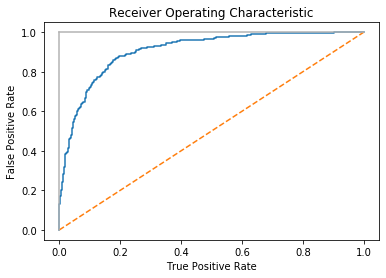

In [63]:
# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0,0],[1,0], c=".7"), plt.plot([1,1],c=".7")
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.show

In [64]:
# Get predicted probabilities
logit.predict_proba(features_test)[0:1]


array([[0.8688938, 0.1311062]])

In [66]:
logit.classes_

array([0, 1])